<a href="https://colab.research.google.com/github/Untick/NetOptik/blob/main/Brutyan%20Ruben/1_%D0%90%D1%83%D0%B3%D0%BC%D0%B5%D0%BD%D1%82%D0%B0%D1%86%D0%B8%D1%8F_%D0%B8%D0%B7%D0%BE%D0%B1%D1%80%D0%B0%D0%B6%D0%B5%D0%BD%D0%B8%D0%B9_(%D0%B4%D0%BB%D1%8F_2_3_%D1%85_%D0%BA%D0%BB%D0%B0%D1%81%D1%81%D0%BE%D0%B2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Программа для Аугментации тестовых изображений из разных классов

In [ ]:
# Подключение Googe-диска

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Загрузка библиотек и размеров

Для 2-х и 3-х класов

In [ ]:
# загрузка модуля ImageDataGenerator из библиотеки tensorflow генерации данных изображений
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
from tensorflow.keras.preprocessing.image import save_img

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Размеры изображения
img_height = 450
img_width = 675
batch_size = 1

# Функция для вывода изображений
def display_images(image_files):
    num_images = len(image_files)
    # Расчет количества строк и столбцов для подграфиков
    num_rows = num_images // 2 + num_images % 2
    num_cols = 2

    plt.figure(figsize=(10, 5))                       # Размер общего окна

    for index, image_file in enumerate(image_files):
        img = mpimg.imread(image_file)                # Чтение изображения
        plt.subplot(num_rows, num_cols, index+1)      # Размещение изображения на соответствующий подграфик
        plt.imshow(img)                               # Отображение изображения
        plt.axis("off")                               # Отключение осей/координат

    plt.tight_layout()                                # Автоматический выбор расположения подграфиков в общем окне
    plt.show()                                        # Отображение изображений на экране

# **Аугментация 2-х классов**

## Начальные данные

In [ ]:
# Папки для 2-х классовой модели (категории мателл и пластик)
test_dir = '/content/drive/MyDrive/НетОптик/Dataset/DS_2classes/test'                    # папка с исходными тестовыми изображениями (все категории)
test_dir_а = '/content/drive/MyDrive/НетОптик/Dataset/DS_2classes/augment'               # папка для клонов (все категории)
test_dir_1p_а = '/content/drive/MyDrive/НетОптик/Dataset/DS_2classes/augment/class_1p'   # папка для клонов (пластик)
test_dir_2m_а = '/content/drive/MyDrive/НетОптик/Dataset/DS_2classes/augment/class_2m'   # папка для клонов (металл)

# Функции def

Функции для генерирования изображений (для 2-х и для 3-х классов):

In [ ]:
# Функция настройки для генератора данных изображений (ImageDataGenerator)
def Генерирование(class_):
  test_datagen_a = ImageDataGenerator(
    rotation_range=12,                            # случайные повороты в диапазоне [-12, 12] градусов
    width_shift_range=3.0,                        # случайное горизонтальное смещение в диапазоне [-5.0, 5.0]
    height_shift_range=5.0 ,                      # случайное вертикальное смещение в диапазоне [-5.0, 5.0]
    # shear_range=0.2,
    zoom_range=0.2,                               # случайное масштабирование в диапазоне [0.8, 1.2]
    # fill_mode='nearest'
    horizontal_flip=True,                         # Случайное отражение изображений по горизонтали
)
# Генератор данных для ТЕСТИРОВАНИЯ на основе изображений из папки test_dir с исходными изображениями
  test_generator = test_datagen_a.flow_from_directory(
      test_dir,
      target_size=(img_height, img_width),
      batch_size=batch_size,
      classes=class_,
      shuffle=False                               # Перемешивание выборки
)
  return test_generator

# Функция для сохранения сгенерированных тестовых изображений в папку test_dir_а
def Клонирование(test_dir_а, material):
  for i in range(num_images):
    augmented_image = next(test_generator)[0][0]
    augmented_images.append(augmented_image)

  for i, image in enumerate(augmented_images):
      save_path = os.path.join(test_dir_а, f"a_{material}_{i}.jpg")
      save_img(save_path, image)
  print(f"Количество сгенерированных изображений в папку для клонов: {len(augmented_images)}")

## Клонирование

In [ ]:
augmented_images = []                                                           # Количество аугментированных изображений (пустой список)
num_images = 54                                                                  # Количество аугментированных изображений, которые хотим получить

# Клонирование пластика
test_generator = Генерирование(['class_1p'])
Клонирование(test_dir_1p_а, '1p')

Found 18 images belonging to 1 classes.
Количество сгенерированных изображений в папку для клонов: 54


In [ ]:
augmented_images = []                                                           # Количество аугментированных изображений (пустой список)
num_images = 54                                                                  # Количество аугментированных изображений, которые хотим получить

# Клонирование метала
test_generator = Генерирование(['class_2m'])
Клонирование(test_dir_2m_а, '2m')

Found 18 images belonging to 1 classes.
Количество сгенерированных изображений в папку для клонов: 54


# Проверка

## *Количество аугментированных изображений*

In [ ]:
# Список имен классов для Test
TEST_CLASS_LIST = os.listdir(test_dir_а)

# Количество классов для Test
TEST_CLASS_COUNT = len(TEST_CLASS_LIST)

test_samples = len(os.listdir(test_dir_1p_а)) + len(os.listdir(test_dir_2m_а))

# Проверка результата
print(f'Метки проверочных классов TEST_CLASS_LIST: {TEST_CLASS_LIST}\n')
print(f"Количество аугментированных картинок в {TEST_CLASS_COUNT}-х папках : {test_samples} =  {len(os.listdir(test_dir_1p_а))} + {len(os.listdir(test_dir_2m_а))}")

Метки проверочных классов TEST_CLASS_LIST: ['class_1p', 'class_2m']

Количество аугментированных картинок в 2-х папках : 108 =  54 + 54


## *Имена файлов изображений*

In [ ]:
# Список файлов для каждого класса Test
print("Подпапки (классы) в папке test_dir_а:\n")
for test_name_folder in TEST_CLASS_LIST:
  test_file_name = sorted(os.listdir(f'{test_dir_а}/{test_name_folder}/'))
  print(f'В папке "{test_name_folder}" всего {len(test_file_name)} картинок:\n{test_file_name}')

Подпапки (классы) в папке test_dir_а:

В папке "class_1p" всего 54 картинок:
['a_1p_0.jpg', 'a_1p_1.jpg', 'a_1p_10.jpg', 'a_1p_11.jpg', 'a_1p_12.jpg', 'a_1p_13.jpg', 'a_1p_14.jpg', 'a_1p_15.jpg', 'a_1p_16.jpg', 'a_1p_17.jpg', 'a_1p_18.jpg', 'a_1p_19.jpg', 'a_1p_2.jpg', 'a_1p_20.jpg', 'a_1p_21.jpg', 'a_1p_22.jpg', 'a_1p_23.jpg', 'a_1p_24.jpg', 'a_1p_25.jpg', 'a_1p_26.jpg', 'a_1p_27.jpg', 'a_1p_28.jpg', 'a_1p_29.jpg', 'a_1p_3.jpg', 'a_1p_30.jpg', 'a_1p_31.jpg', 'a_1p_32.jpg', 'a_1p_33.jpg', 'a_1p_34.jpg', 'a_1p_35.jpg', 'a_1p_36.jpg', 'a_1p_37.jpg', 'a_1p_38.jpg', 'a_1p_39.jpg', 'a_1p_4.jpg', 'a_1p_40.jpg', 'a_1p_41.jpg', 'a_1p_42.jpg', 'a_1p_43.jpg', 'a_1p_44.jpg', 'a_1p_45.jpg', 'a_1p_46.jpg', 'a_1p_47.jpg', 'a_1p_48.jpg', 'a_1p_49.jpg', 'a_1p_5.jpg', 'a_1p_50.jpg', 'a_1p_51.jpg', 'a_1p_52.jpg', 'a_1p_53.jpg', 'a_1p_6.jpg', 'a_1p_7.jpg', 'a_1p_8.jpg', 'a_1p_9.jpg']
В папке "class_2m" всего 54 картинок:
['a_2m_0.jpg', 'a_2m_1.jpg', 'a_2m_10.jpg', 'a_2m_11.jpg', 'a_2m_12.jpg', 'a_2m_13.j

# Вывод изображений

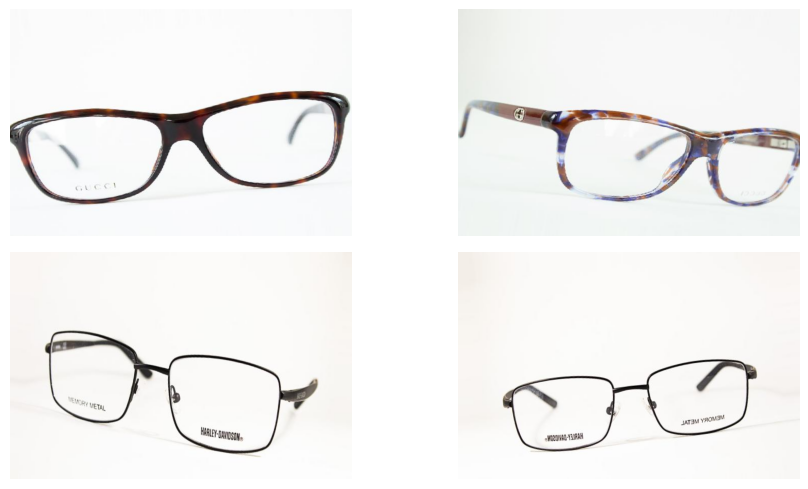

In [ ]:
# Пути к первым дмум изображениям каждого класса
image_path1 = f'{test_dir_1p_а}/a_1p_0.jpg'
image_path2 = f'{test_dir_1p_а}/a_1p_1.jpg'
image_path3 = f'{test_dir_2m_а}/a_2m_0.jpg'
image_path4 = f'{test_dir_2m_а}/a_2m_1.jpg'

image_paths = [image_path1, image_path2, image_path3, image_path4]

# Вызов функции для вывода изображений
display_images(image_paths)

# **Аугментация 3-х классов**

## Начальные данные

In [ ]:
# Папки для 3-х классовой модели (категории втулка, ободок, леска)
test_dir = '/content/drive/MyDrive/НетОптик/Dataset/DS_3classes/test'                     # папка с исходными тестовыми изображениями (все категории)
test_dir_а = '/content/drive/MyDrive/НетОптик/Dataset/DS_3classes/augment'                # папка для клонов (все категории)
test_dir_vt_а = '/content/drive/MyDrive/НетОптик/Dataset/DS_3classes/augment/vtulka'      # папка для клонов (втулка)
test_dir_ob_а = '/content/drive/MyDrive/НетОптик/Dataset/DS_3classes/augment/obodok'      # папка для клонов (ободок)
test_dir_le_а = '/content/drive/MyDrive/НетОптик/Dataset/DS_3classes/augment/leska'       # папка для клонов (леска)

# Функции def

Аналогичная функция, см. как у 2-х

## Клонирование

In [ ]:
augmented_images = []                                                           # Количество аугментированных изображений (пустой список)
num_images = 92                                                                  # Количество аугментированных изображений, которые хотим получить ==60

# Клонирование втулки
test_generator = Генерирование(['vtulka'])
Клонирование(test_dir_vt_а, 'vtulka')

Found 10 images belonging to 1 classes.
Количество сгенерированных изображений в папку для клонов: 92


In [ ]:
augmented_images = []                                                           # Количество аугментированных изображений (пустой список)
num_images = 4                                                                  # Количество аугментированных изображений, которые хотим получить

# Клонирование ободков
test_generator = Генерирование(['obodok'])
Клонирование(test_dir_ob_а, 'obodok')

In [ ]:
augmented_images = []                                                           # Количество аугментированных изображений (пустой список)
num_images = 3                                                                  # Количество аугментированных изображений, которые хотим получить

# Клонирование лесок
test_generator = Генерирование(['leska'])
Клонирование(test_dir_le_а, 'leska')

# Проверка

## *Количество аугментированных изображений*

In [ ]:
# Список имен классов для Test
# TEST_CLASS_LIST = sorted(os.listdir(test_dir_а))
TEST_CLASS_LIST = os.listdir(test_dir_а)

# Количество классов для Test
TEST_CLASS_COUNT = len(TEST_CLASS_LIST)

test_samples = len(os.listdir(test_dir_vt_а)) + len(os.listdir(test_dir_ob_а))+ len(os.listdir(test_dir_le_а))

# Проверка результата
print(f'Метки проверочных классов TEST_CLASS_LIST: {TEST_CLASS_LIST}\n')
print(f"Количество аугментированных картинок в {TEST_CLASS_COUNT}-х папках : {test_samples} =  {len(os.listdir(test_dir_vt_а))} + {len(os.listdir(test_dir_ob_а))} + {len(os.listdir(test_dir_le_а))}")

Метки проверочных классов TEST_CLASS_LIST: ['obodok', 'leska', 'vtulka']

Количество аугментированных картинок в 3-х папках : 92 =  92 + 0 + 0


## *Имена файлов изображений*

In [ ]:
# Список файлов для каждого класса Test
print("Подпапки (классы) в папке Dataset/DS_3classes/augment:\n")
for augment_name_folder in TEST_CLASS_LIST:
  augment_file_folder = sorted(os.listdir(f'{test_dir_а}/{augment_name_folder}/'))
  print(f'В подпапке "{augment_name_folder}" всего {len(augment_file_folder)} картинок:\n{augment_file_folder}')

Подпапки (классы) в папке Dataset/DS_3classes/augment:

В подпапке "obodok" всего 0 картинок:
[]
В подпапке "leska" всего 0 картинок:
[]
В подпапке "vtulka" всего 92 картинок:
['a_vtulka_0.jpg', 'a_vtulka_1.jpg', 'a_vtulka_10.jpg', 'a_vtulka_11.jpg', 'a_vtulka_12.jpg', 'a_vtulka_13.jpg', 'a_vtulka_14.jpg', 'a_vtulka_15.jpg', 'a_vtulka_16.jpg', 'a_vtulka_17.jpg', 'a_vtulka_18.jpg', 'a_vtulka_19.jpg', 'a_vtulka_2.jpg', 'a_vtulka_20.jpg', 'a_vtulka_21.jpg', 'a_vtulka_22.jpg', 'a_vtulka_23.jpg', 'a_vtulka_24.jpg', 'a_vtulka_25.jpg', 'a_vtulka_26.jpg', 'a_vtulka_27.jpg', 'a_vtulka_28.jpg', 'a_vtulka_29.jpg', 'a_vtulka_3.jpg', 'a_vtulka_30.jpg', 'a_vtulka_31.jpg', 'a_vtulka_32.jpg', 'a_vtulka_33.jpg', 'a_vtulka_34.jpg', 'a_vtulka_35.jpg', 'a_vtulka_36.jpg', 'a_vtulka_37.jpg', 'a_vtulka_38.jpg', 'a_vtulka_39.jpg', 'a_vtulka_4.jpg', 'a_vtulka_40.jpg', 'a_vtulka_41.jpg', 'a_vtulka_42.jpg', 'a_vtulka_43.jpg', 'a_vtulka_44.jpg', 'a_vtulka_45.jpg', 'a_vtulka_46.jpg', 'a_vtulka_47.jpg', 'a_vtulka_4

# Вывод изображений

Аналогичная функция, см. как у 2-х

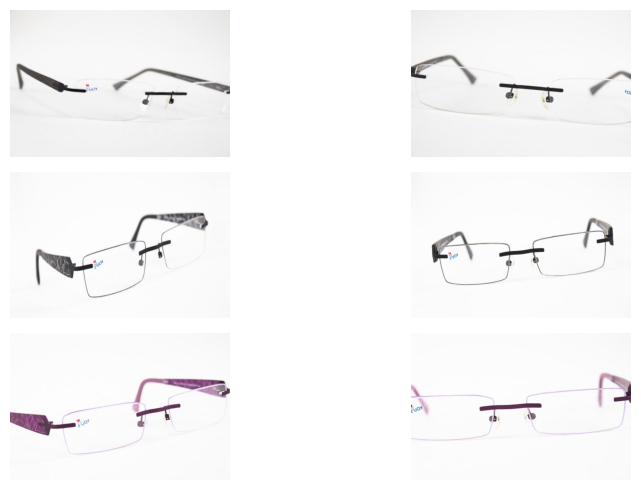

In [ ]:
image_path1 = f'{test_dir_vt_а}/a_vtulka_0.jpg'  # Пути к первым шести изображениям класса
image_path2 = f'{test_dir_vt_а}/a_vtulka_1.jpg'
image_path3 = f'{test_dir_vt_а}/a_vtulka_2.jpg'
image_path4 = f'{test_dir_vt_а}/a_vtulka_3.jpg'
image_path5 = f'{test_dir_vt_а}/a_vtulka_4.jpg'
image_path6 = f'{test_dir_vt_а}/a_vtulka_5.jpg'

# image_paths = [image_path1, image_path2]
image_paths = [image_path1, image_path2, image_path3, image_path4, image_path5, image_path6]


display_images(image_paths)